In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/abutalha/Documents/Data Analyst/AI Quest/Data Science/heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

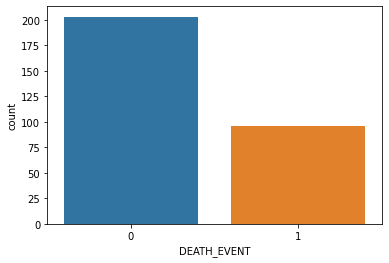

In [7]:
sns.countplot(x='DEATH_EVENT', data=df)

<AxesSubplot:>

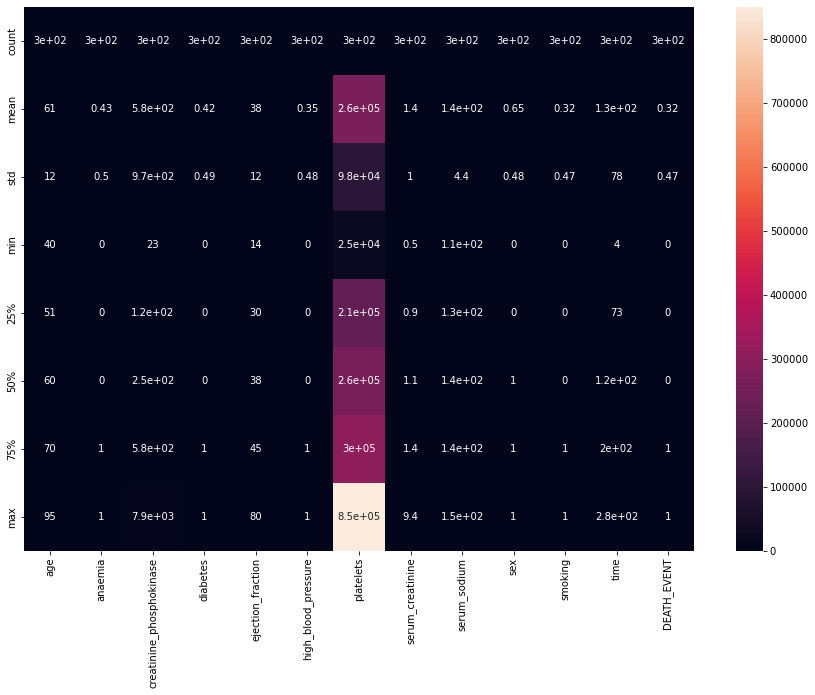

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe(), annot=True)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

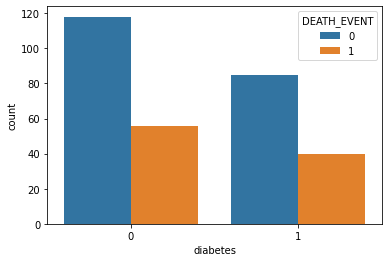

In [9]:
sns.countplot(x= 'diabetes', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='smoking', ylabel='count'>

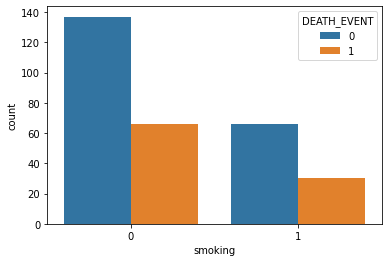

In [10]:
sns.countplot(x= 'smoking', hue='DEATH_EVENT', data=df)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('DEATH_EVENT', axis=1)

In [13]:
y = df['DEATH_EVENT']

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.30, random_state=1)

In [15]:
Xtrain.shape

(209, 12)

In [16]:
ytrain.shape

(209,)

In [17]:
Xtest.shape

(90, 12)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf = DecisionTreeClassifier()

In [20]:
clf.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [21]:
pred = clf.predict(Xtest)

In [22]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [23]:
np.array(ytest)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1])

In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, plot_roc_curve

In [27]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.85        64
           1       0.65      0.58      0.61        26

    accuracy                           0.79        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.78      0.79      0.78        90



In [28]:
cm = confusion_matrix(ytest, pred)

In [29]:
cm

array([[56,  8],
       [11, 15]])

In [31]:
clf.score(Xtest, ytest)

0.7888888888888889

In [33]:
accuracy_score(ytest, pred)

0.7888888888888889

In [35]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [36]:
tp

56

In [37]:
fn

8

In [38]:
fp

11

In [39]:
tn

15

In [40]:
#Accuracy
accuracy = (tp+tn) / (tp+fp+tn+fn)

In [41]:
accuracy

0.7888888888888889

In [42]:
#Percision or Positive Predictive Value
ppv = tp / (tp+fp)

In [43]:
ppv

0.835820895522388

In [44]:
#Sensitivity, Recall, Hit Rate, True Positive Rate
tpr = tp / (tp+fp)

In [45]:
tpr

0.835820895522388

In [46]:
#False Positive Rate, 1-Specificity

fpr = fp / (fp+tn)

In [47]:
fpr

0.4230769230769231

In [50]:
#F1 Messsure
f1_m = (ppv+tpr) / 2

In [51]:
f1_m

0.835820895522388

In [52]:
#Harmonic Mean, F1 Score
f1_score = (2*ppv*tpr) / (ppv+tpr)

In [53]:
f1_score

0.835820895522388

In [54]:
#Specificity, Selectivity, True Negetive Rate
tnr = tn / (tn+fp)

In [55]:
tnr

0.5769230769230769

In [56]:
#Threat Score, Critical Success Index
csi = tp / (tp+fn+fp)

In [57]:
csi

0.7466666666666667

In [58]:
#False Descovery Rate
fdr = fp / (tp+fp)

In [59]:
fdr

0.16417910447761194

<AxesSubplot:>

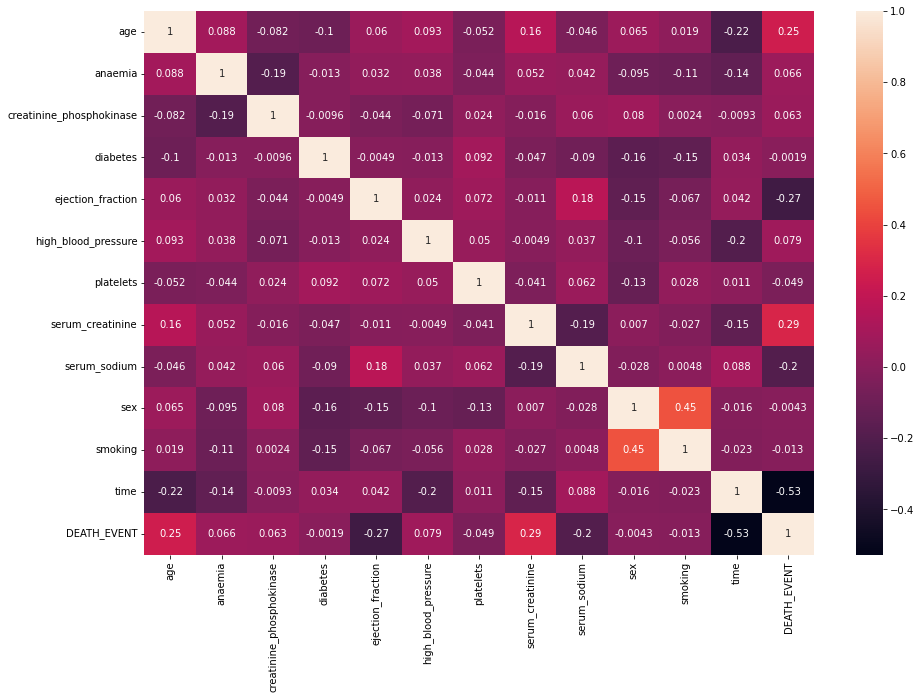

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

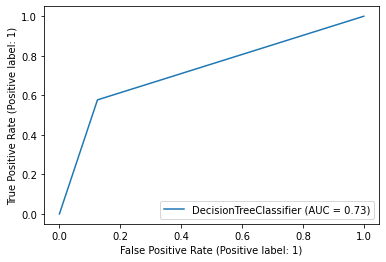

In [63]:
#Roc
plot_roc_curve(clf, Xtest, ytest)

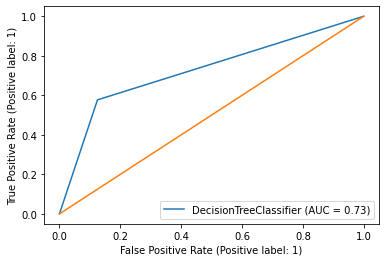

In [67]:
plot_roc_curve(clf, Xtest, ytest)
plt.plot([0,1],[0,1])

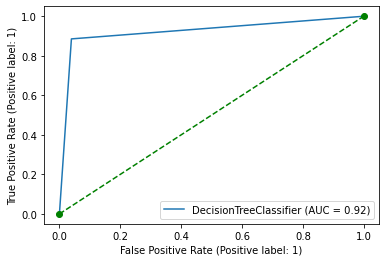

In [74]:
plot_roc_curve(clf,X,y)
plt.plot([0,1],[0,1],'go--')